In [4]:
import pandas as pd
df = pd.read_csv("08_Data.csv")
del df['Unnamed: 0']
df = df.dropna()
df.head()

,Code_Num,Datetime,Process_Type,ST,Tube Furnace CP,Tube Furnace1 OP,Tube Furnace1 Temp,Tube Furnace2 OP,Tube Furnace2 Temp,Tube Furnace3 OP,Tube Furnace3 Temp,Tube Furnace4 OP,Tube Furnace4 Temp,Z1-OP1,Z1-OP2,Z1-Temp
2,GroupA,2022-01-03 11:22,OP-A,68.724636,0.454914,78.946336,866.441979,62.235532,882.850031,52.218350,864.373065,72.705558,893.530501,72.909936,71.579322,99.614201
3,GroupA,2022-01-03 11:22,OP-A,69.161116,0.456540,78.445719,876.350472,61.608260,906.208463,52.863552,891.107865,73.975640,896.347636,68.754355,73.537496,99.376221
4,GroupA,2022-01-03 11:22,OP-C,69.181098,0.460100,76.673808,903.587677,61.589311,867.215131,52.297196,893.206883,71.887865,871.594283,69.692302,72.461153,99.809053
5,GroupA,2022-01-03 11:22,OP-C,69.472810,0.459051,76.161977,893.336100,61.131382,901.009384,52.514548,891.501638,71.805968,882.495792,73.802112,72.207883,99.770424
6,GroupA,2022-01-03 11:22,OP-C,69.189685,0.459515,75.879256,898.617693,59.644186,889.460401,52.466639,864.222256,71.868823,877.136764,71.219875,76.886609,99.852337


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92847 entries, 2 to 93042
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code_Num            92847 non-null  object 
 1   Datetime            92847 non-null  object 
 2   Process_Type        92847 non-null  object 
 3   ST                  92847 non-null  float64
 4   Tube Furnace CP     92847 non-null  float64
 5   Tube Furnace1 OP    92847 non-null  float64
 6   Tube Furnace1 Temp  92847 non-null  float64
 7   Tube Furnace2 OP    92847 non-null  float64
 8   Tube Furnace2 Temp  92847 non-null  float64
 9   Tube Furnace3 OP    92847 non-null  float64
 10  Tube Furnace3 Temp  92847 non-null  float64
 11  Tube Furnace4 OP    92847 non-null  float64
 12  Tube Furnace4 Temp  92847 non-null  float64
 13  Z1-OP1              92847 non-null  float64
 14  Z1-OP2              92847 non-null  float64
 15  Z1-Temp             92847 non-null  float64
dtypes: float6

In [8]:
# 1. Tube Furnace CP와 상관관계가 가장 높은 항목 5개
df2 = df.select_dtypes("number")       # 숫자타입의 데이터만
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92847 entries, 2 to 93042
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ST                  92847 non-null  float64
 1   Tube Furnace CP     92847 non-null  float64
 2   Tube Furnace1 OP    92847 non-null  float64
 3   Tube Furnace1 Temp  92847 non-null  float64
 4   Tube Furnace2 OP    92847 non-null  float64
 5   Tube Furnace2 Temp  92847 non-null  float64
 6   Tube Furnace3 OP    92847 non-null  float64
 7   Tube Furnace3 Temp  92847 non-null  float64
 8   Tube Furnace4 OP    92847 non-null  float64
 9   Tube Furnace4 Temp  92847 non-null  float64
 10  Z1-OP1              92847 non-null  float64
 11  Z1-OP2              92847 non-null  float64
 12  Z1-Temp             92847 non-null  float64
dtypes: float64(13)
memory usage: 9.9 MB


In [11]:
# 정규성 확인 

from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

for i in df2:
    A = df2[i]
    print(shapiro(A))
    
# 대부분이 정규성을 따르지 않음 => 스피어만 상관계수로 확인

ShapiroResult(statistic=0.9919430002985946, pvalue=6.02471638456974e-53)
ShapiroResult(statistic=0.8279351822232911, pvalue=6.238117360027577e-126)
ShapiroResult(statistic=0.8379390017251848, pvalue=3.375856440793524e-124)
ShapiroResult(statistic=0.9660302816626498, pvalue=2.7391515538805105e-83)
ShapiroResult(statistic=0.7957573455358531, pvalue=5.843029033678003e-131)
ShapiroResult(statistic=0.9555939199731938, pvalue=1.0288044992152465e-89)
ShapiroResult(statistic=0.9985487437265089, pvalue=5.850228179713368e-26)
ShapiroResult(statistic=0.9556536257641134, pvalue=1.1097111593721895e-89)
ShapiroResult(statistic=0.9666071778406905, pvalue=6.920306018754893e-83)
ShapiroResult(statistic=0.9557398150385935, pvalue=1.2380480815967524e-89)
ShapiroResult(statistic=0.9999705673953138, pvalue=0.6708496664714432)
ShapiroResult(statistic=0.9999709053923321, pvalue=0.6824632442875107)
ShapiroResult(statistic=0.9700945098859223, pvalue=2.559879352696689e-80)


In [19]:
cols = list(abs(df2.corr(method="spearman")['Tube Furnace CP']).sort_values(ascending = False).iloc[1:6].index)
cols

['Tube Furnace1 OP', 'Tube Furnace3 OP', 'Z1-Temp', 'Tube Furnace4 OP', 'ST']

In [24]:
from scipy.stats import stats
import statsmodels.api as sm

# 회귀선의 기울기가 유의미하고 특정한 경향성을 따르는지.
# - 기울기가 유의미한 통계량을 보이지만, Tube Furnace CP 변동을 거의 설명하지못한다.

# 각 독립 변수의 회귀 계수는 통계적으로 유의미하다.

X = df[cols]
Y = df['Tube Furnace CP']

X = sm.add_constant(X)      # 상수항 추가

model = sm.OLS(Y, X).fit()
print(model.summary())


# 3-1. F-statistic으로 보니 유의미하긴한데, R-squared값이 너무 낮음
# = 기울기가 유의미한 통계량을 보이지만, Tube Furnace CP 변동을 거의 설명하지 못한다

# 3-2. 각 독립 변수의 회귀 계수는 통계적으로 유의미하다

                            OLS Regression Results                            
Dep. Variable:        Tube Furnace CP   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     273.1
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          5.48e-291
Time:                        09:15:55   Log-Likelihood:             3.5426e+05
No. Observations:               92847   AIC:                        -7.085e+05
Df Residuals:                   92841   BIC:                        -7.085e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5305      0.004  

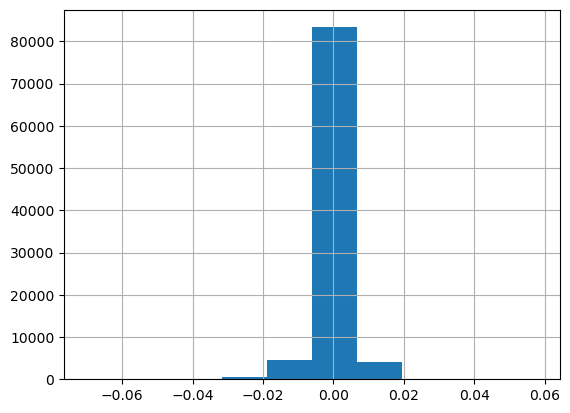

In [26]:
import matplotlib.pyplot as plt

residuals = model.resid    # 잔차값으로 실행 가능

plt.hist(residuals)
plt.grid()
plt.show()

# 히스토그램 결과 - 정규분포처럼 생겼나?? 가운데에 너무 몰렸음 

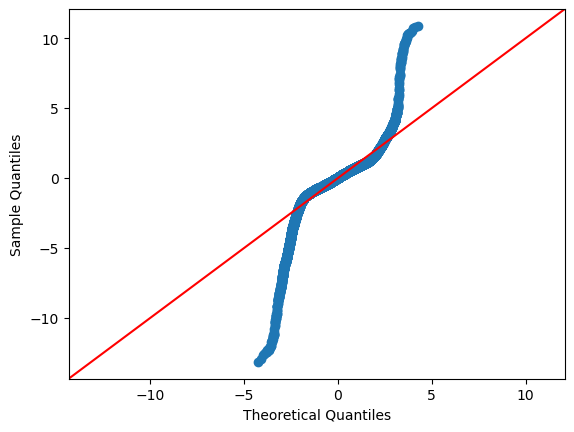

In [29]:
sm.qqplot(residuals, line = '45', fit = True)
plt.show()

# Q-Q plot 결과 - 정규성을 별로 따르는 거 같지 않아보임

In [31]:
shapiro(residuals)

# 샤피로 결과 - 잔차는 정규성을 따르지 않는다

ShapiroResult(statistic=0.8417036864891464, pvalue=1.6040245716264592e-123)

In [35]:
# 5개의 설명변수 값이 50, 80, 100, 75, 200 일때 Tube Furnace CP 값 예측
A = pd.DataFrame([{"const" : 1,
                 cols[0] : 50,
                 cols[1] : 80,
                 cols[2] : 100,
                 cols[3] : 75,
                 cols[4] : 200}])

model.predict(A)

0    0.438375
dtype: float64

In [37]:
# Z1-OP1(공정건조온도 출력량)의 분포 이상치를 판별하고
# Code_Num(공정배치그룹)과 이상치 분류를 만들어서 독립성 검정.

mean = df['Z1-OP1'].mean()
std = df['Z1-OP1'].std()

In [45]:
from scipy import stats

df["Label"] = abs(df['Z1-OP1'] - mean) > 3 * std
# False값이 정상, True값이 비정상

A = pd.crosstab(df['Code_Num'], df['Label'])
stats.chi2_contingency(A)

# p > 0.05 => 차이없다

Chi2ContingencyResult(statistic=4.989089966683042, pvalue=0.41721311617336254, dof=5, expected_freq=array([[7.32284511e+03, 1.71548892e+01],
       [1.30893362e+04, 3.06637802e+01],
       [2.69109570e+04, 6.30430493e+01],
       [3.16528483e+04, 7.41516581e+01],
       [6.20147210e+03, 1.45279007e+01],
       [7.45254128e+03, 1.74587224e+01]]))